<h1 align='center'> Model Development For Predicting Price of AutoMobile   </h1>

We will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.

Some questions we want to ask in this module

Do I know if the dealer is offering fair value for my trade-in?
Do I know if I put a fair value on my car?
**Data Analytics**, we often use Model Development to help us predict future observations from the data we have.

A Model will help us understand the exact relationship between different variables and how these variables are used to predict the result.

<h4>Setup</h4>

Import pandas,numpy and matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load data and store in dataframe auto:

This dataset was hosted on IBM Cloud object and is obtained after performing Data Wrangling on the original dataset.

In [2]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
auto=pd.read_csv(path)
auto.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h3>1. Linear Regression and Multiple Linear Regression</h3>

**Linear Regression**
One example of a Data Model that we will be using is

**Simple Linear Regression.**
Simple Linear Regression is a method to help us understand the relationship between two variables:

->The predictor/independent variable (X)<br>
->The response/dependent variable (that we want to predict)(Y)<br><br>
The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.



$$
 Y: Response \ Variable\\
 X: Predictor \ Variables
$$



<b>Linear function:</b>
$$
Yhat = b0 + b1* X
$$

<ul>
    <li>b0 refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b1 refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>

<h4>Lets load the modules for linear regression</h4>

In [3]:
from sklearn.linear_model import LinearRegression

<h4>Create the linear regression object</h4>

In [4]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<h4>How could Engine-size help us predict car price?</h4>

We want to look at how ***engine-size*** can help us predict car price. Using simple linear regression, we will create a linear function with ***engine-size*** as the predictor variable and the ***price*** as the response variable.

In [5]:
X=auto[['engine-size']]
Y=auto['price']


Fit the Linear model using ***engine-size***

In [6]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We can output a prediction

In [7]:
Yhat=lm.predict(X) ##Here We are using the given values of engine-size so that we can see how the predicted and actual values vary.
Yhat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

<h4>What is the value of the intercept (b0)?<h4>

In [30]:
b0=lm.intercept_
b0

-7963.338906281049

<h4>What is the value of the coefficient (b1)?<h4>

In [32]:
b1=lm.coef_
b1

array([166.86001569])

What is the final estimated linear model we get?
As we saw above, we should get a final linear model with the structure:

$$
𝑌ℎ𝑎𝑡=b0 + 𝑏1*𝑋
$$
Plugging in the actual values we get:

price = -7963.34 + 166.86 x engine-size

**Multiple Linear Regression**


What if we want to predict car price using more than one variable?

If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression.We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:

The equation is given by
$$
𝑌ℎ𝑎𝑡=b0+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4
$$
From the previous section we know that other good predictors of price could be:

->Horsepower(X1)<br>
->Curb-weight(X2)<br>
->Engine-size(X3)<br>
->Highway-mpg(X4)<br><br>
Let's develop a model using these variables as the predictor variables.

In [30]:
Z=auto[['horsepower','curb-weight','engine-size','highway-mpg']]

Fit the linear model using the four above-mentioned variables.

In [31]:
lm.fit(Z,auto['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

What is the value of the intercept(b0)?

In [38]:
b0=lm.intercept_
b0

-15806.624626329198

In [42]:
b1=lm.coef_
b1

53.495744226049275

What is the final estimated linear model that we get?

As we saw above, we should get a final linear function with the structure:
$$
𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4
$$
What is the linear function we get?

In [44]:
print('Price = ',b0,' + ',b1[0],'* X1',' + ',b1[1],'* X2',' + ',b1[2],'* X3',' + ',b1[3],'* X4')

Price =  -15806.624626329198  +  53.495744226049275 * X1  +  4.707700994613924 * X2  +  81.53026382122763 * X3  +  36.0574888164859 * X4


<h3>2) Model Evaluation using Visualization</h3>

Now that we've developed some models, how do we evaluate our models and how do we choose the best one? One way to do this is by using visualization.

Import the visualization package: seaborn

In [11]:
import seaborn as sns
%matplotlib inline

### Regression Plot
When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using **regression plots**.

This plot will show a combination of a scattered data points (a **scatter plot**), as well as the fitted **linear regression** line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).



Let's visualize Engine Size as potential predictor variable of price:

(0.0, 53335.91877588441)

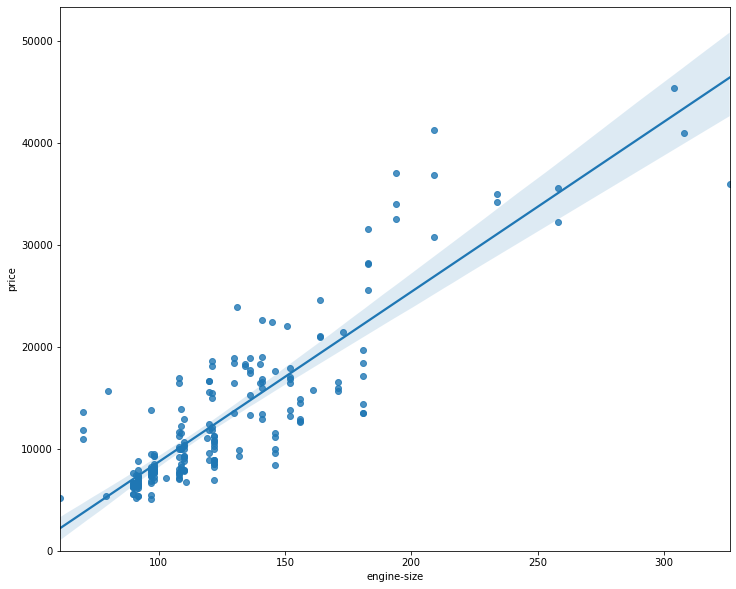

In [13]:
plt.figure(figsize=(12,10))
sns.regplot(x='engine-size',y='price',data=auto)
plt.ylim(0,)

We can see from this plot that "engine-size" is positively correlated since the regression line is positive.Now we need to look at how the data points are scattered around the regression line.This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data. Let's compare this plot to the regression plot of "peak-rpm".

(0.0, 47414.1)

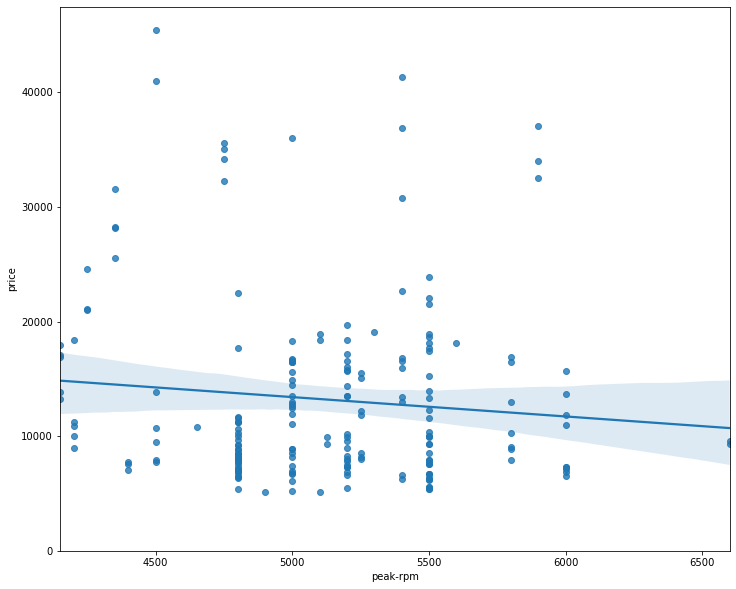

In [15]:
plt.figure(figsize=(12, 10))
sns.regplot(x="peak-rpm", y="price", data=auto)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "engine-size" we see that the points for "engine-size" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "engine-size" increases.

We can prove this by finding the correlation between **price,engine-size,peak-rpm**.

In [16]:
auto[['engine-size','peak-rpm','price']].corr()

,engine-size,peak-rpm,price
engine-size,1.000000,-0.256733,0.872335
peak-rpm,-0.256733,1.000000,-0.101616
price,0.872335,-0.101616,1.000000


The variable "engine-size" has a stronger correlation with "price", it is approximate ~0.872335  compared to   "peak-rpm" which is approximate     -0.101616.

<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

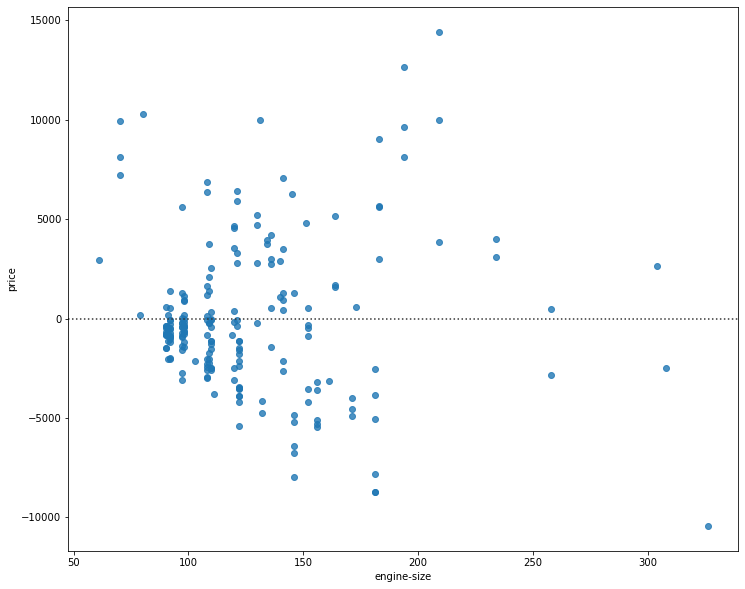

In [19]:
plt.figure(figsize=(12,10))
sns.residplot(auto['engine-size'],auto['price'])


What is this plot telling us?

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

### Multiple Linear Regression

<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the distribution plot: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>

First lets make a prediction

In [33]:
#z=auto[['horsepower','curb-weight','engine-size','highway-mpg']]
#lm.fit(z,auto['price'])
Y_hat=lm.predict(Z)

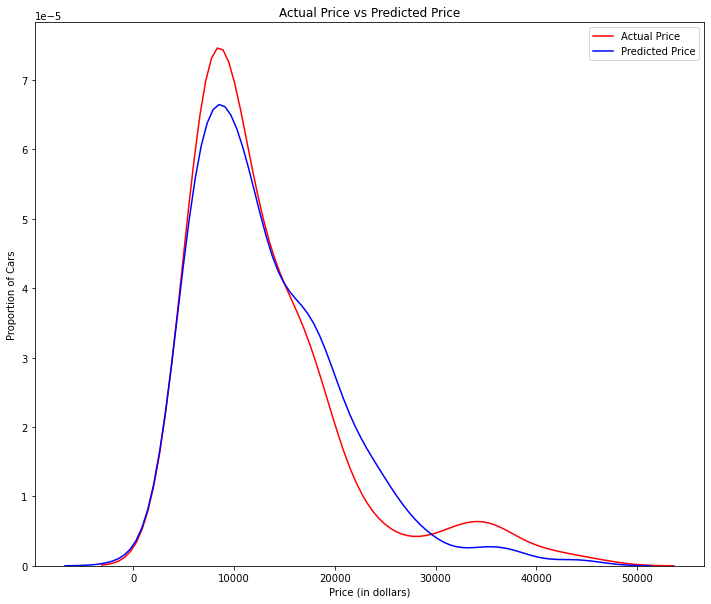

In [34]:

plt.figure(figsize=(12,10))

ax1=sns.distplot(auto['price'],hist=False,color='r',label='Actual Price')
sns.distplot(Y_hat,hist=False,color='b',label='Predicted Price',ax=ax1)

plt.title("Actual Price vs Predicted Price")
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()


We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap. However, there is definitely some room for improvement.

<h2>Part 3: Polynomial Regression and Pipelines</h2>
<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>



We saw earlier that a linear model did not provide the best fit while using engine-size as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

We will use the following function to plot the data:

In [36]:
def PlotPoly(model,independent_variable,dependent_variable,Name):
    x_new=np.linspace(auto['engine-size'].min()-1,auto['engine-size'].max()+1,100)
    y_new=model(x_new)
    
    plt.plot(independent_variable,dependent_variable,'.',x_new,y_new,'-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Engine Size')
    ax=plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    plt.show()
    plt.close()
    

Lets get the variables

In [38]:
x=auto['engine-size']
y=auto['price']

Let's fit the polynomial using the function <code>polyfit</code>, then use the function <code>poly1d</code> to display the polynomial function.

In [49]:
# Here we use polynomial of the 5th order
f=np.polyfit(x,y,5)
p=np.poly1d(f)
print(p)

           5             4           3         2
-1.74e-07 x + 0.0001599 x - 0.06214 x + 12.71 x - 1129 x + 4.219e+04


Let's plot the function

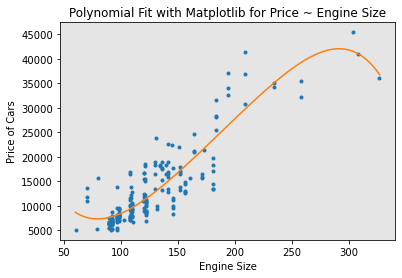

In [50]:
PlotPoly(p,x,y,'Engine Size')

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

We can perform a polynomial transform on multiple features. First, we import the module:

In [51]:
from sklearn.preprocessing import PolynomialFeatures

We create a **PolynomialFeatures** object of degree 2:

In [52]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [53]:
Z_pr=pr.fit_transform(Z)

The original data is of 201 samples and 4 features

In [55]:
Z.shape

(201, 4)

After the transformation, there 201 samples and 15 features

In [56]:
Z_pr.shape

(201, 15)

<h2>Pipeline</h2>

Data Pipelines simplify the steps of processing the data. We use the module <code>Pipeline</code> to create a pipeline. We also use StandardScaler as a step in our pipeline.



In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [60]:
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

We input the list as an argument to the pipeline constructor

In [62]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

We can normalize the data, perform a transform and fit the model simultaneously.

In [64]:
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously

In [65]:
ypipe=pipe.predict(Z)
ypipe[0:5]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

<h2>Part 4: Measures for In-Sample Evaluation</h2>

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</p>

<h3>Model 1: Simple Linear Regression</h3>

Let's calculate the R^2

In [68]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


We can say that ~ 76.09% of the variation of the price is explained by this simple linear model "engine-size_fit".

Let's calculate the MSE

We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

In [70]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [13728.4631336  13728.4631336  17399.38347881 10224.40280408]


Lets import the function <code>mean_squared_error</code> from the module metrics

In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
mse=mean_squared_error(auto['price'],Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.02517414


<h3>Model 2: Multiple Linear Regression </h3>

Let's calculate the R^2

In [74]:
lm.fit(Z,auto['price'])
print("The R-square is:",lm.score(Z,auto['price']))

The R-square is: 0.8093562806577457


We can say that ~ 80.935 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate the MSE

we produce a prediction

In [77]:
Y_predict=lm.predict(Z)
mse1=mean_squared_error(auto['price'],Y_predict)
print('The mean square error of price and predicted value is: ', mse1)

The mean square error of price and predicted value is:  11980366.87072649


<h3>Model 3: Polynomial Fit</h3>

Let's calculate the R^2

let’s import the function <code>r2_score</code> from the module metrics as we are using a different function

In [80]:
from sklearn.metrics import r2_score

In [81]:
r_squared=r2_score(y,p(x))
print('The R-square is: ',r_squared )

The R-square is:  0.7906096915403376


We can say that ~ 79.06 % of the variation of price is explained by this polynomial fit

We can also calculate MSE:
    

In [82]:
mean_squared_error(auto['price'],p(x))

13158433.559606604

<h2>Part 5: Prediction and Decision Making</h2>
<h3>Prediction</h3>


Create a new input

In [86]:
new_input=np.arange(50,350,1).reshape(-1,1)
# Fit the Model
lm.fit(X,Y)
# Produce a prediction
yhat=lm.predict(new_input)
yhat[0:5]

array([ 379.66187829,  546.52189398,  713.38190967,  880.24192536,
       1047.10194106])

We can plot the data

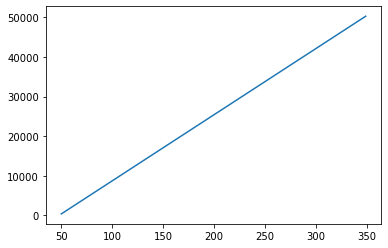

In [87]:
plt.plot(new_input,yhat,'-')
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Engine Size as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.7609686</li>
    <li>MSE: 1.50 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.8093562</li>
    <li>MSE: 1.19 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Engine Size as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.790609</li>
    <li>MSE: 1.31 x 10^7</li>
</ul>
</p>

<h2>Conclusion:</h2>

<p>Comparing these Three models Multiple Linear Regression(MLR) has the least Mean Squared Error and highest value for R-Square and hence we conclude that MLR model is the best model to be able to predict the price of the automobile from our dataset.